In [22]:
#Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
#Посмотрите на распределение признака для числовых переменных, устраните выбросы.
#Оцените количество уникальных значений для номинативных переменных.
#По необходимости преобразуйте данные
#Проведите корреляционный анализ количественных переменных
#Отберите не коррелирующие переменные.
#Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
#Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

from google.colab import files
uploaded = files.upload()

In [23]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv') #читаем файл

#Функция для того чтобы проставить медианное значение для числовых столбцов.
def set_median_int(df, columns_list): 
  #На вход имя фрейма и массив колонок
  for column in columns_list: #проходим по каждой колонке и проставляем медианное значение если NAN
    df[column] = df[column].apply(lambda x: df[column].median() if pd.isna(x)== True else x)

#функция для того чтобы проставить рандомное значение из существующих в датаесте
def set_rand_value(df, columns_list):
  #На вход имя фрейма и массив колонок
  for column in columns_list: #Перебираем колонки
    col = str(column) #для дальнейшей работы преобразуем в текст имя столбца
    default_values  = df[col].loc[df[col].isnull()!=True].unique() #Выбираем только уникальные значения из столбца
    nan_indexes = df.loc[df[col].isnull()==True].index #получаем индексы только нуловых строк
    for item in nan_indexes: #Перебираем наши пустые строки
      df.loc[df.index==item, col] = random.choice(default_values) #и проставляем случайное значение из существующих

#Функция для того чтобы проставить самое частое значение для НЕ числовых столбцов.
def set_mode(df, columns_list):
  #На вход имя фрейма и массив колонок
  for column in columns_list: #проходим по каждой колонке и проставляем самое популярное значение если NAN
    df[column] = df[column].apply(lambda x: df[column].value_counts().index[0] if pd.isna(x)== True else x)

#функция для создания boxPlot по набору колонок
def get_boxplot(column):
    #на вход наименование колоноки, в ответе боКсплоты
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

#функция для удаления столбцов
def drop_col(df, colum_names):
  #на вход фрейм и массив колонок, далее в цикле удаляем коллонки
  for row in colum_names:
    row= str(row)
    df.drop([row], inplace = True, axis = 1)

def create_hist(col): #Функия для отрисовки графиков для числовых значений. На вход имя колонки.
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))
  axes[0].hist(stud[col])
  axes[0].set_title(col)
  axes[1].scatter(x=stud[col], y=stud['score'])
  axes[1].set_title(col+'+score')


In [4]:
#Переименуем колонки в более читабельные + все с маленькой буквы
stud = stud.rename(columns={'studytime, granular': 'stud_time_gran', 'goout':'go_out', 'Pstatus':'parent_status',
                            'Medu':'medu','Fedu':'fedu', 'Mjob':'mjob', 'Fjob':'fjob'})

stud.famsize = stud.famsize.replace('LE3', 'Less than 3') #Проставляем читабельное значение размера семьи
stud.famsize = stud.famsize.replace('GT3', 'Greater than 3')

stud.sex = stud.sex.replace('M', 'Male') #Проставляем читабельный пол
stud.sex = stud.sex.replace('F', 'Female')

stud.address = stud.address.replace('U', 'City') #Проставляем читабельное значение места жительства
stud.address = stud.address.replace('R', 'Ranch')

stud.parent_status = stud.parent_status.replace('T', 'Together') #Проставляем читабельное значение того как живут родители
stud.parent_status = stud.parent_status.replace('A', 'Apart')

Посмотрим на числовые колонки на графиках и может найдём что-то интересное.

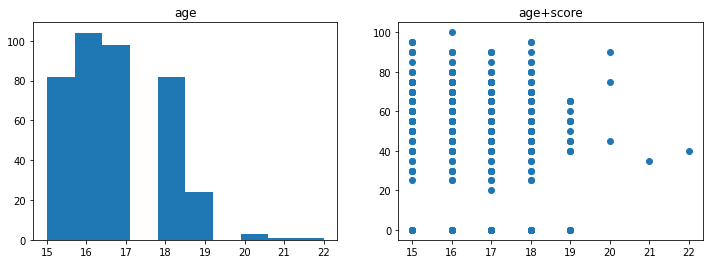

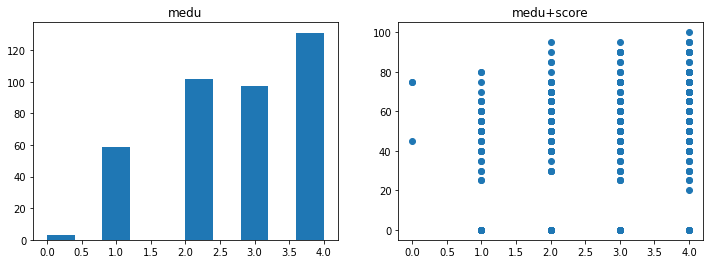

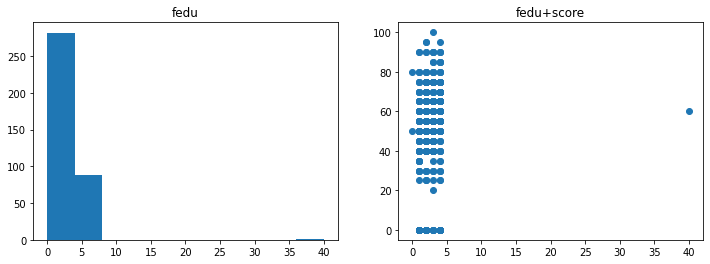

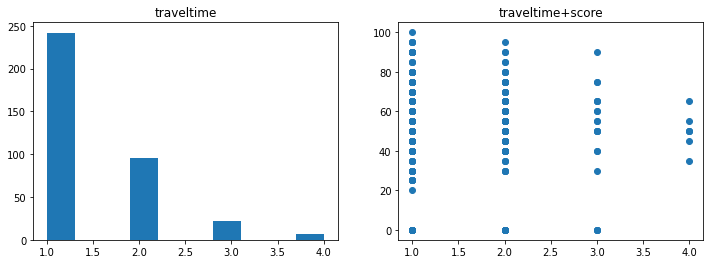

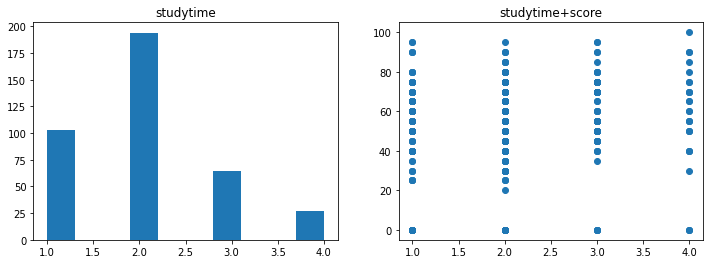

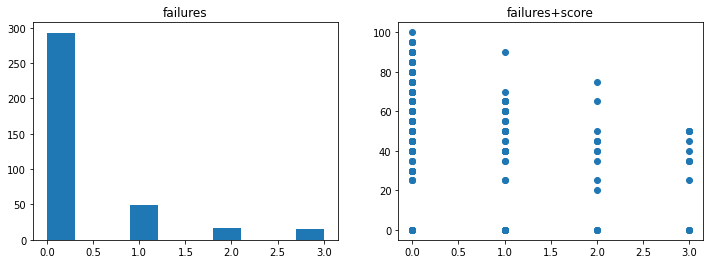

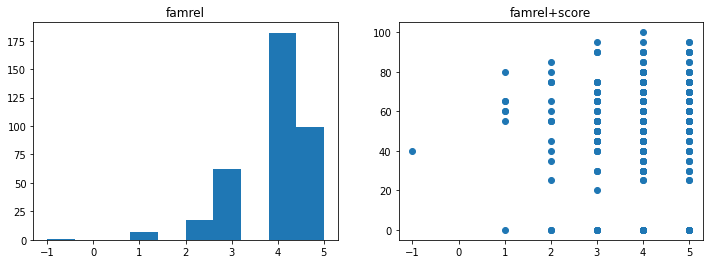

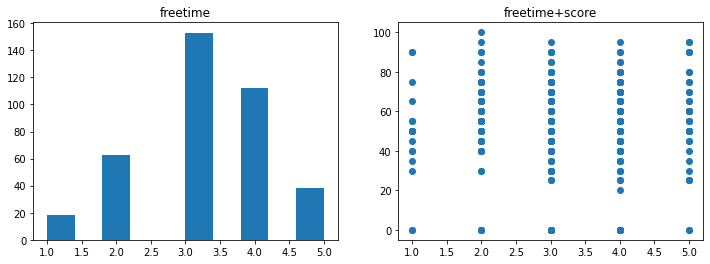

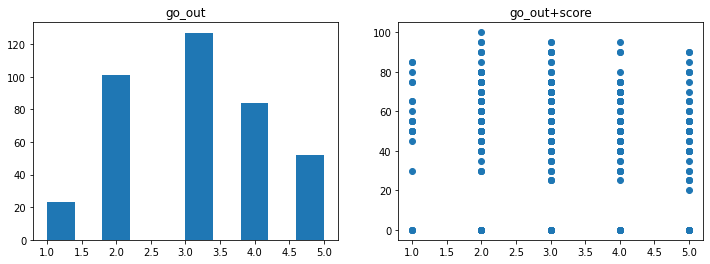

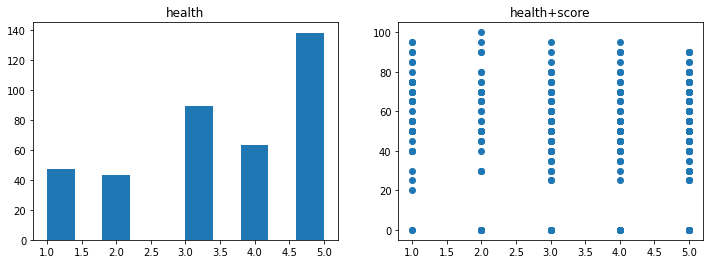

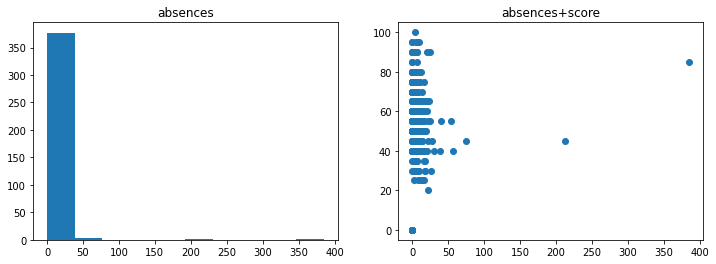

In [5]:
cols_list = ['age','medu','fedu','traveltime','studytime','failures','famrel','freetime','go_out','health','absences']
for col in cols_list:
  create_hist(col)

Первичный результат проверок полей*(каждое проверил на выбросы и наличие пустых значений отдельно, в код задания не включал тк слишком много однотипных и не нужных действий)*
*   Поле Sex - нет пустых значений(ура).
*   Поле Age - нет пустых значений и нет выбросов. Группа 20+ малочисленна. Если бы колонка была не числовой, имел бы смысл сгруппировать данные.
*   Поле Address - есть пустые значения.
*   famsize - есть пустые значения(27 шт).
*   parent_status - 45 пустых значений.
*   Medu - есть пустые значения.
*   Fedu - есть пустые значения и выбросы(значений свыше 4 не должно быть по условию).
*   Mjob - есть пустые значения, отклонений нет.
*   Fjob - есть пустые значения, отклонений нет.
*   reason - 41 пустое значение, отклонений нет.
*   guardian - есть пустые значения, отклонений нет.
*   traveltime - есть пустые значения, отклонений нет. Наши школьники мало путешествуют.
*   studytime - есть пустые значения, отклонений нет.
*   failures - есть пустые значения, отклонений нет. Но мало значений больше 1.
*   schoolsup - есть пустые значения, отклонений нет.
*   famsup - есть пустые значения, отклонений нет.
*   paid - есть пустые значения, отклонений нет.
*   activities - есть пустые значения, отклонений нет, разбивка поровну.
*   nursery - есть пустые значения, отклонений нет.
*   stud_time_gran - **Странное поле** Есть выбросы. Явная обратная корреляция от stud_time.
*   higher - есть пустые значения, отклонений нет.
*   internet - есть пустые значения, отклонений нет.
*   romantic - есть пустые значения, отклонений нет.
*   famrel - есть пустые значения и выбросы(значений меньше 1 не должно быть по условию).
*   freetime - есть пустые значения, отклонений нет.
*   goout - есть пустые значения, отклонений нет.
*   health - есть пустые значения, отклонений нет.
*   absences - есть пустые значения, есть выбросы(привести к медиане).
*   score  - есть пустые значения, отклонений нет. Пустые значения нужно удалить тк это целевая переменная

В ячейке ниже базовые преобразования над данными. Переименование столбцов, текстовые атрибуты делаем читаемыми, отфильтровываем невалидные данные(первый этап)

In [6]:
stud = stud.loc[stud.fedu <= 4.] #отфильтруем значения в образовании отца свыше 4.
stud = stud.loc[stud.famrel > 0] #отфильтруем значения в домашних отношениях меньше единицы
stud = stud.loc[stud.score.isnull()!=True] #и Главное! отфильтруем данные где score пустой.
stud.absences.loc[stud.absences>100] = stud.absences.median() #заменим на медианные значения данные о пропусках свыше 100

In [7]:
stud.head()

,school,sex,age,address,famsize,parent_status,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,stud_time_gran,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
0,GP,Female,18,City,NaN,Apart,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,Female,17,City,Greater than 3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,Female,15,City,Less than 3,Together,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,Female,15,City,Greater than 3,Together,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,Female,16,City,Greater than 3,Together,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0



Окей, а что по корреляции числовых значений?

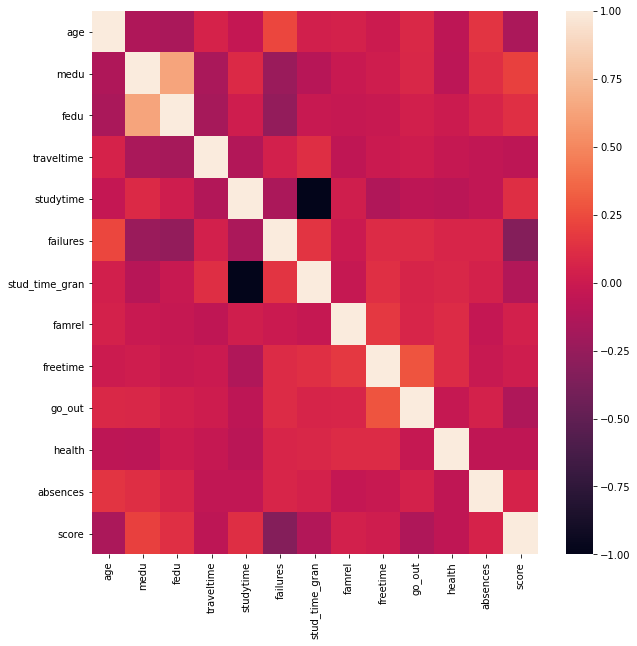

In [8]:
fig, ax = plt.subplots(figsize=(10,10)) #посмотрим в виде тепловой карты
sns.heatmap(stud.corr(), ax=ax)

Корреляции есть, но хочется более точечно посмотреть на них.

In [9]:
#и более точечно
corr_fields = stud.corr().stack() #Получаем таблицу корреляций
corr_fields.name = 'Most Correlation fields' #дадим название
corr_fields.index.names = ['Col1', 'Col2'] #и переименуем для красоты
corr_fields[(corr_fields != 1.0)&((corr_fields > 0.3)|(corr_fields < -0.3))].to_frame() #отфильтруем явные корреляции поля самому к себе
# и ставим фильтр на + 0.3 чтобы посмотреть по больше того что есть в данных

,,Most Correlation fields
Col1,Col2,
medu,fedu,0.639219
fedu,medu,0.639219
studytime,stud_time_gran,-1.000000
failures,score,-0.331450
stud_time_gran,studytime,-1.000000
score,failures,-0.331450


Есть явная корреляция образования родителей друг к другу. *Люди выбирают людей из своего круга? или часто знакомятся в университете?*

Наиболее явные корреляции всё ещё достаточно слабые:
*  score-failures         -0.331450 - чем больше оценка тем меньше внеучебных неудач(или их так много что чаще встречается значение 0, по условию заполнения поля)
*  Fedu-failures         -0.264906 - лучше образование отца-меньше ошибок
*  goout-freetime          0.283055 - тут понятно. Свободное время и время с друзьями
*  age-failures          0.255513 - чем старше тем меньше ошибок
*  score-Medu              0.205382 - образование матери больше влияет на оценку

Есть обратая корреляция между stud_time и stud_time_gran на уровне -1. Больше почти ни от чего это поле не зависит. Тк нет описания этого поля, и они дублируют друг друга, думаю что из датасета его можно удалить.

In [10]:
stud.drop(['stud_time_gran'], inplace = True, axis = 1) #Удаляем stud_time_gran

Проверим влияние не числовых полей

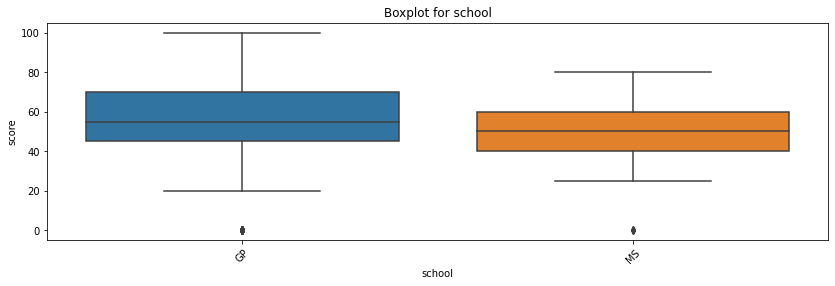

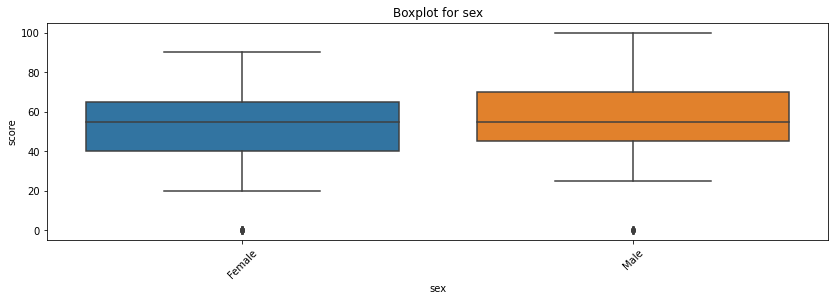

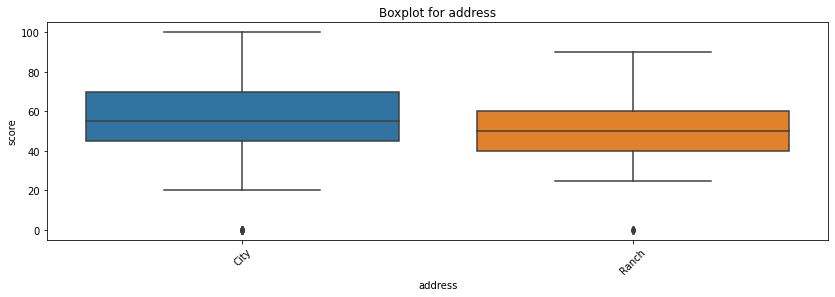

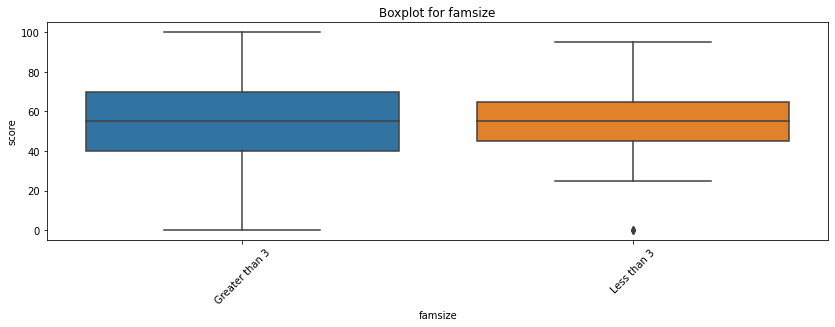

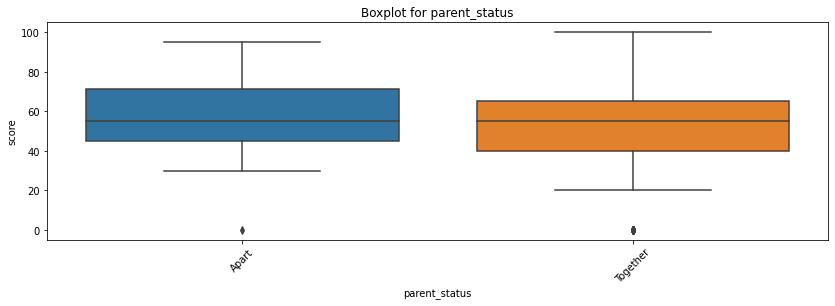

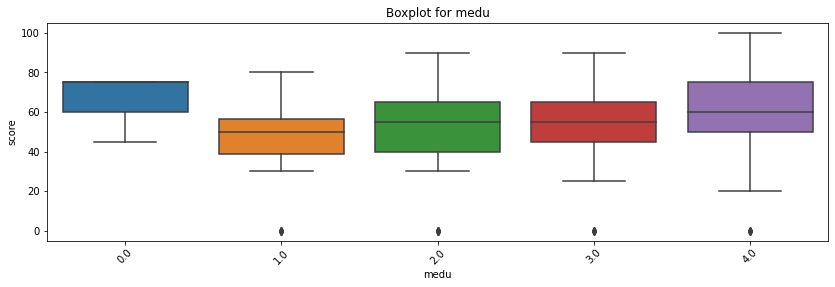

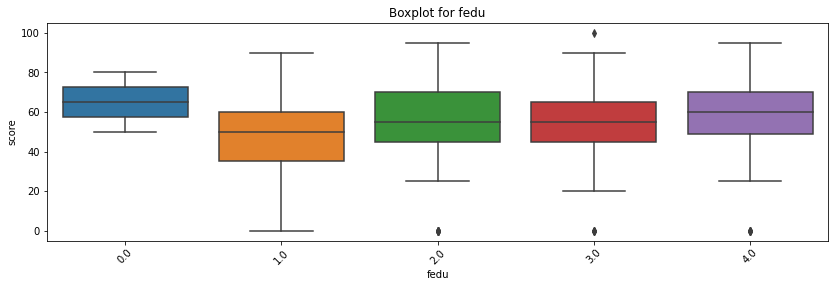

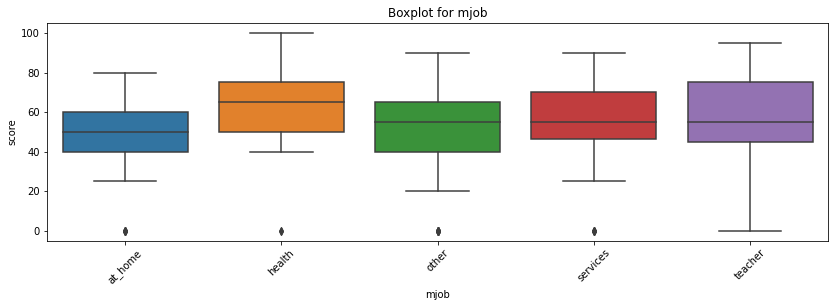

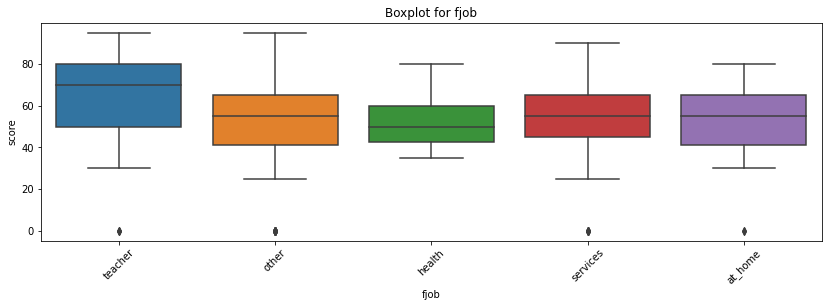

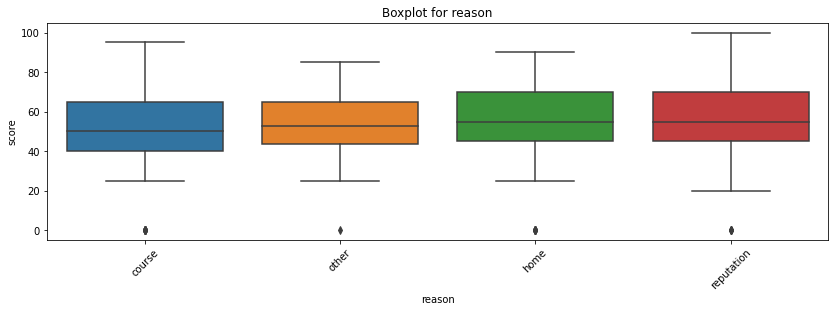

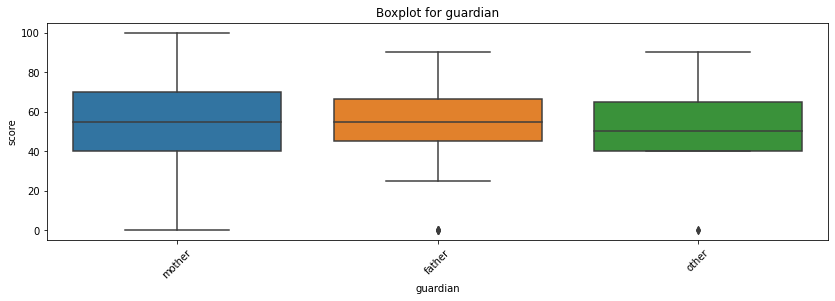

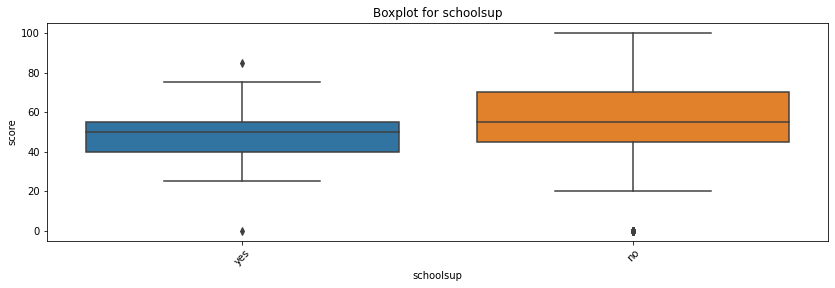

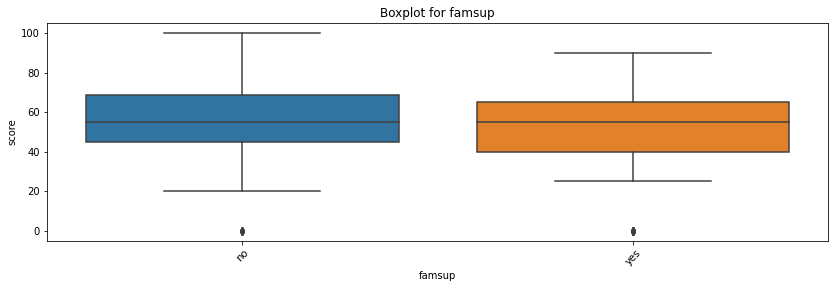

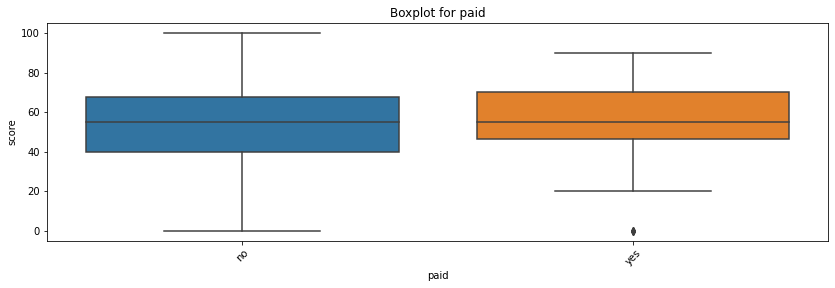

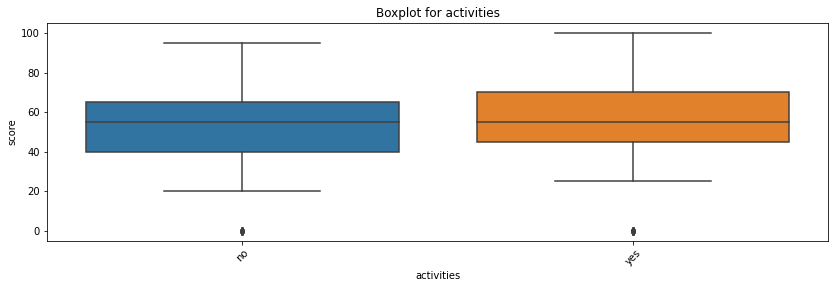

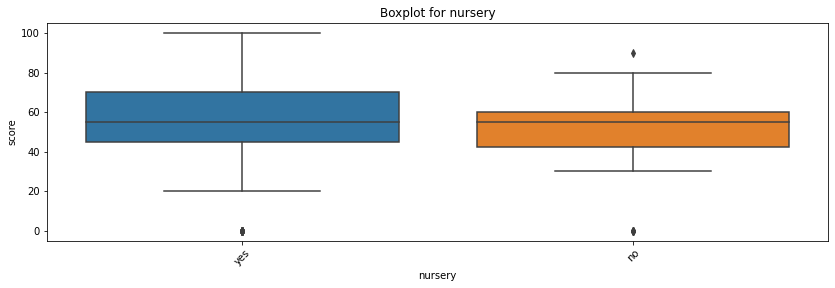

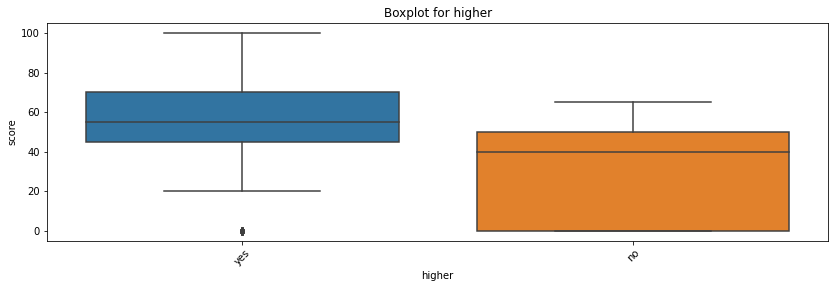

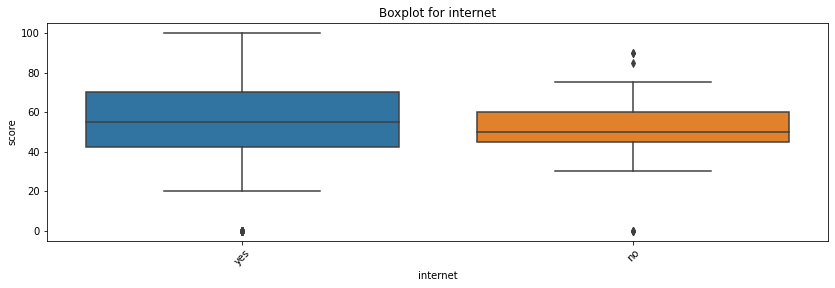

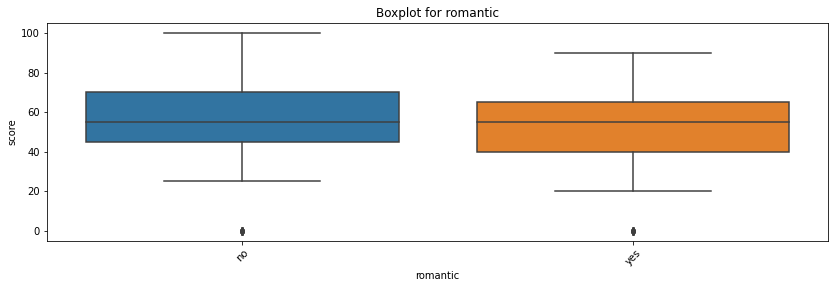

In [11]:
for col in ['school','sex','address','famsize','parent_status','medu','fedu','mjob','fjob','reason','guardian',
            'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

Многие переменные влияют на результат. Из наблюдений:
*  fjob - все професии объединить в одну кроме учителя. Тк она влияет на результат, остальные почти нет.
*  Очень слабо влияет reason, fsize, parent_status, guardian, paid


Посмотрим что тест Стьюдента покажет

In [12]:
def get_stat_dif(column):
  cols = stud.loc[:, column].value_counts().index[:10]
  combinations_all = list(combinations(cols, 2))
  for comb in combinations_all:
    if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue<= 0.05/len(combinations_all): # Учли поправку Бонферони
      print('Найдены статистически значимые различия для колонки', column)
      break

for col in ['school','sex','address','famsize','parent_status','medu','fedu','mjob','reason','guardian',
            'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:get_stat_dif(col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher


отлично 
*  Найдены статистически значимые различия для колонки medu
*  Найдены статистически значимые различия для колонки paid
*  Найдены статистически значимые различия для колонки higher

А что по пропускам?

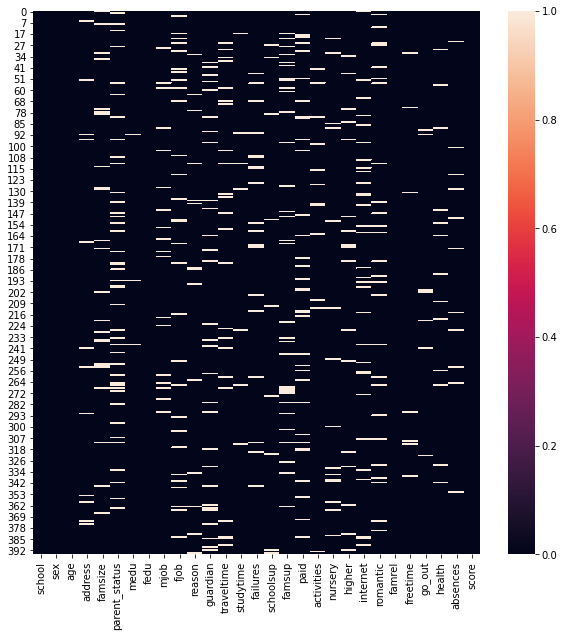

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(stud.isnull(), ax=ax)

Пропуски +- нормально распределены. Меньше всего в famrel, образование родителей, школа, пол, возраст. Есть группы пропусков в famsup и paid. Попробуем их исправить.
Данных мало, удалить плохой вариант.

*Идеально было бы как-то заполнить пропуски на основании данных о смежных столбцах(выбрать моду/медиану по набору смежных признаков) но до реализации не дошли руки.*

In [14]:
columns_list = ['age','medu', 'fedu','traveltime','studytime','failures',
                'famrel','freetime','go_out','health','absences','score']#Все числовые столбцы
set_median_int(stud, columns_list) #функция для числовых столбцов, заполянем медианой

columns_list=['parent_status','medu','fedu','mjob','fjob','reason','guardian']#Все столбцы кроме тех, которые содержат всего два значения
set_mode(stud, columns_list)#функция для номинативных столбцов. заполняем модой

columns_list =['school', 'sex', 'address', 'famsize', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
set_rand_value(stud, columns_list) #Заполняем случайными значениями из той же колонки. Тогда соотношение переменных будет соблюдено.

#сгруппируем данные о професиях отца в одну как выяснили раньше. тк влияющая группа - Учитель, остальное не влияет
stud.fjob.loc[stud.fjob!='teacher'] = 'other'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


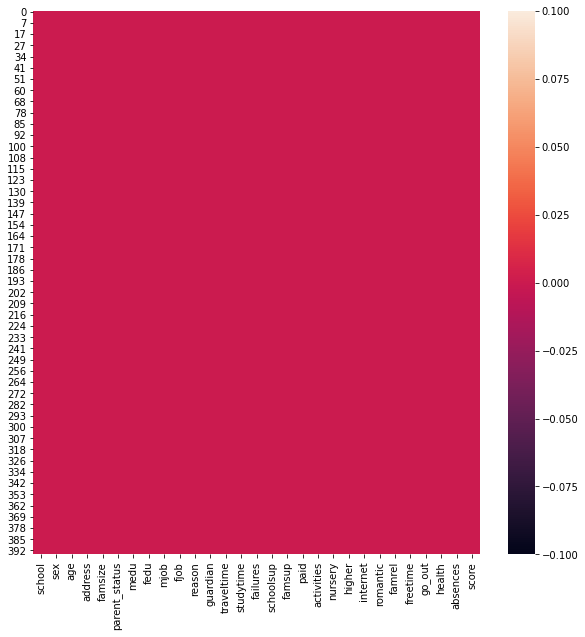

In [15]:
#Пропуски
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(stud.isnull(), ax=ax)

Всё, пропусков нет. Посмотрим поменялись ли значения в тесте Стьюдента

In [16]:
def get_stat_dif(column):
  cols = stud.loc[:, column].value_counts().index[:10]
  combinations_all = list(combinations(cols, 2))
  for comb in combinations_all:
    if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue<= 0.05/len(combinations_all): # Учли поправку Бонферони
      print('Найдены статистически значимые различия для колонки', column)
      break

for col in ['school','sex','address','famsize','parent_status','medu','fedu','mjob','reason','guardian',
            'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:get_stat_dif(col)

#Судя по всему на ответ теста может влиять рандом, которым я заполнял значения раньше. Вероятно надо более интеллектуальную систему заполнения пропусков

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки paid


Так, тест возвращает те же данные значит наши изменения не повлияли на результат теста.
Удалим колонки которые, на основании boxplot и теста Стьюдента не существенны и перейдём к выводам.

In [17]:
#Удаляем famsize, parent_status, paid, activities, nursery, guardian, reason
drop_list = ['famsize', 'parent_status', 'activities', 'nursery', 'reason', 'guardian', 'traveltime']
drop_col(stud, drop_list)

Данные достаточно "грязные". Аномалий почти нет(кроме ```Fedu``` и ```famrel``` их почистил), есть много пустых значений, которые пришлось дополнять тк в датасете в целом мало данных. Для числовых колонок заполнял медианой, для текстовых - модой, для колонок с двумя значениями или признаками Да/Нет случайным значением колонки.
Выбросов достаточно мало, а те что были, чаще всего, находились в пределах шкалы значений.

Тест Стьюдента показал что:
*  Найдены статистически значимые различия для колонки ```address```
*  Найдены статистически значимые различия для колонки ```medu```
*  Найдены статистически значимые различия для колонки ```mjob```
*  Найдены статистически значимые различия для колонки ```higher```
*  Найдены статистически значимые различия для колонки ```romantic```

Однако на результаты теста может влиять способ заполнения пропусков и при разных запусках я получал разные значения.


Так же я формировал boxPlot по числовым колонкам, все они так или иначе имеют отличия, поэтому в выборке их оставил. Колонки которые явно не влияют судя по диаграммам и тесту: ```famsize, parent_status, activities, nursery, reason, guardian, traveltime``` .